<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-DL-case-study/blob/DeepLearning-Models/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt



In [ ]:
# Load IMDB dataset
vocab_size = 2000 # Only top 10,000 words
max_length = 200 # Limit each review to 200 words

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


In [ ]:
# Pad sequences to ensure uniform input size for LSTM
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


In [ ]:
x_train

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]], dtype=int32)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 214s 549ms/step - accuracy: 0.7876 - loss: 0.4559 - val_accuracy: 0.8414 - val_loss: 0.3791
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 548ms/step - accuracy: 0.8489 - loss: 0.3530 - val_accuracy: 0.8599 - val_loss: 0.3352
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 291s 621ms/step - accuracy: 0.8785 - loss: 0.2967 - val_accuracy: 0.8584 - val_loss: 0.3262
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 233s 547ms/step - accuracy: 0.9001 - loss: 0.2526 - val_accuracy: 0.8578 - val_loss: 0.3437


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.8563 - loss: 0.3458
Test Accuracy: 85.78%


In [ ]:
# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


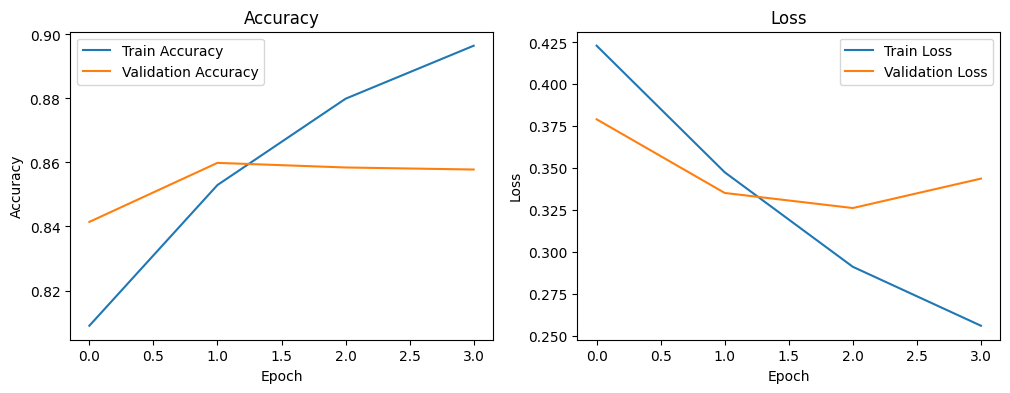

In [ ]:
# Display training history
plot_history(history)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenizer to convert words to integer indices
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(imdb.get_word_index())


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def preprocess_review(review):
  # Convert review to a sequence of integers
  review_seq = tokenizer.texts_to_sequences([review])
  # Pad the sequence
  return pad_sequences(review_seq, maxlen=max_length)


In [ ]:
def predict_sentiment(review):
  # Preprocess the review
  processed_review = preprocess_review(review)
  # Predict sentiment
  prediction = model.predict(processed_review)
  # Convert prediction to binary outcome (0: negative, 1: positive)
  sentiment = 'Positive' if prediction > 0.5 else 'Negative'
  return sentiment


In [ ]:
# Example usage
review = "This movie was fantastic! I really enjoyed it."
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Review: This movie was fantastic! I really enjoyed it.
Sentiment: Positive


In [ ]:
# Example usage
review = "This movie was good."
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Review: This movie was good.
Sentiment: Positive
